In [1]:
import os

import mysql.connector
from dotenv import load_dotenv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
load_dotenv()

user = os.getenv('USER')
password = os.getenv('PASSWORD')
host = os.getenv('HOST')
database = 'swiftMarket'

In [3]:
connection = mysql.connector.connect(user = user,
                                     password = password,
                                     host = host,
                                    database = database )
cursor = connection.cursor()

In [4]:
connection.is_connected()

True

In [5]:
query = '''select * from  salesdata limit 5'''
cursor.execute(query)
rows = cursor.fetchall()
for row in rows:
    print(row)

(23000, 'C-2023-100-12', 6002, 1100, datetime.date(2023, 5, 2), 2, Decimal('176432.00'))
(23001, 'C-2023-100-141', 6029, 1115, datetime.date(2023, 12, 26), 2, Decimal('47172.00'))
(23002, 'C-2023-100-86', 6029, 1035, datetime.date(2023, 3, 26), 2, Decimal('47172.00'))
(23003, 'C-2023-100-72', 6006, 1016, datetime.date(2023, 8, 1), 2, Decimal('117644.00'))
(23004, 'C-2023-100-142', 6030, 1067, datetime.date(2023, 3, 6), 5, Decimal('336560.00'))


In [6]:
cursor.column_names

('SaleID',
 'CustomerID',
 'SubcatID',
 'EmployeeID',
 'SaleDate',
 'Quantity',
 'TotalPrice')

In [7]:
pd.DataFrame(data=rows,columns= cursor.column_names)

,SaleID,CustomerID,SubcatID,EmployeeID,SaleDate,Quantity,TotalPrice
0,23000,C-2023-100-12,6002,1100,2023-05-02,2,176432.00
1,23001,C-2023-100-141,6029,1115,2023-12-26,2,47172.00
2,23002,C-2023-100-86,6029,1035,2023-03-26,2,47172.00
3,23003,C-2023-100-72,6006,1016,2023-08-01,2,117644.00
4,23004,C-2023-100-142,6030,1067,2023-03-06,5,336560.00


In [8]:
def read_query(query):
    cursor.execute(query)
    rows = cursor.fetchall()
    return pd.DataFrame(data = rows , columns = cursor.column_names )

In [9]:
query = '''select * from salesdata;'''
read_query(query)

,SaleID,CustomerID,SubcatID,EmployeeID,SaleDate,Quantity,TotalPrice
0,23000,C-2023-100-12,6002,1100,2023-05-02,2,176432.00
1,23001,C-2023-100-141,6029,1115,2023-12-26,2,47172.00
2,23002,C-2023-100-86,6029,1035,2023-03-26,2,47172.00
3,23003,C-2023-100-72,6006,1016,2023-08-01,2,117644.00
4,23004,C-2023-100-142,6030,1067,2023-03-06,5,336560.00
...,...,...,...,...,...,...,...
11996,34996,C-2023-100-163,6019,1060,2023-06-24,1,14047.00
11997,34997,C-2023-100-66,6023,1065,2023-01-03,5,165670.00
11998,34998,C-2023-100-56,6001,1040,2023-02-12,3,28797.00
11999,34999,C-2023-100-174,6020,1098,2023-07-03,1,68360.00


In [10]:
query = """select monthname(s.saledate) as months,
e.firstname,
sum(s.totalprice)  as total_sales
from salesdata s
join employees e on
e.employeeid=s.employeeid
where monthname(s.saledate)='january'
group by e.firstname , monthname(s.saledate)
order by total_sales desc
limit 10;
"""

In [11]:
df = read_query(query)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   months       10 non-null     object
 1   firstname    10 non-null     object
 2   total_sales  10 non-null     object
dtypes: object(3)
memory usage: 372.0+ bytes


identify the top-performing sales representatives based on their total sales
volume

In [13]:
query = """select e.employeeid, e.firstname, e.lastname, SUM(s.TotalPrice) AS total_sales
from employees e
join salesdata s ON e.employeeid = s.employeeid
group BY e.employeeid, e.firstname, e.lastname
order BY total_sales DESC
limit 10;"""

best_performace = read_query(query)
best_performace


,employeeid,firstname,lastname,total_sales
0,1115,Yuvaan,Sidhu,20895341.00
1,1017,Tiya,Hari,19035834.00
2,1029,Shaan,Bhagat,18649467.00
3,1074,Stuvan,Sekhon,18333919.00
4,1001,Fateh,Roy,18231579.00
5,1113,Mannat,Kota,18104646.00
6,1059,Piya,Mall,18054949.00
7,1053,Kiaan,Dora,18049630.00
8,1002,Chirag,Balan,18042772.00
9,1097,Abram,De,17873130.00


In [14]:
Best_performer = best_performace['firstname'].values
Best_performer

array(['Yuvaan', 'Tiya', 'Shaan', 'Stuvan', 'Fateh', 'Mannat', 'Piya',
       'Kiaan', 'Chirag', 'Abram'], dtype=object)

In [15]:
Sales = best_performace['total_sales'].values
Sales

array([Decimal('20895341.00'), Decimal('19035834.00'),
       Decimal('18649467.00'), Decimal('18333919.00'),
       Decimal('18231579.00'), Decimal('18104646.00'),
       Decimal('18054949.00'), Decimal('18049630.00'),
       Decimal('18042772.00'), Decimal('17873130.00')], dtype=object)

In [16]:
best_performace['total_sales'] = best_performace['total_sales'].astype('float')

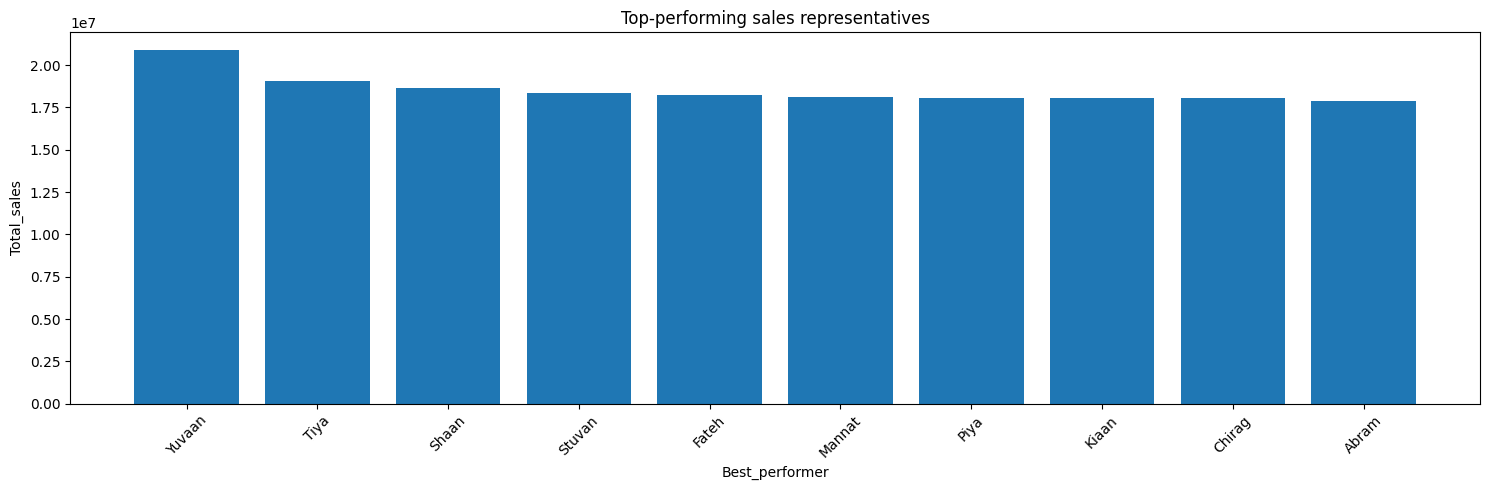

In [17]:
plt.figure(figsize=(15, 5))
plt.bar(Best_performer, Sales)
plt.xlabel('Best_performer')
plt.ylabel('Total_sales')
plt.title('Top-performing sales representatives')
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()

5. What are the total sales made by each employee?


In [18]:
query = '''show tables;'''
read_query(query)

,Tables_in_swiftmarket
0,categories
1,customers
2,employees
3,salesdata
4,subcategories
5,suppliers


In [19]:
query = """
select EmployeeID,
sum(TotalPrice) AS TotalSales
from Salesdata
group BY EmployeeID
limit 10;"""

result_df = read_query(query)
result_df

,EmployeeID,TotalSales
0,1001,18231579.00
1,1002,18042772.00
2,1003,16151819.00
3,1004,13648670.00
4,1005,11565845.00
5,1006,15121183.00
6,1007,15135829.00
7,1008,14239241.00
8,1009,13817169.00
9,1010,12706602.00


-- . Which category has the highest total sales?


In [20]:
query4 = '''
select c.CategoryName , sum(s.TotalPrice)  highest_sales
from subcategories sc
join salesdata s on
sc.SubcatID = s.SubcatID
join categories c on
sc.CategoryID = c.categoryid
group by  c.CategoryName  
order by highest_sales desc;
'''
highest_sales_df = read_query(query4)
highest_sales_df

,CategoryName,highest_sales
0,Pet Supplies and Accessories,361848986.00
1,Health and Wellness Products,324761329.00
2,Electronics and Gadgets,319374417.00
3,Books and Educational Materials,282897933.00
4,Home and Kitchen Appliances,269316684.00
5,Outdoor and Sports Equipment,231074739.00


In [21]:
values = highest_sales_df['highest_sales'].values

labels = highest_sales_df['CategoryName'].values


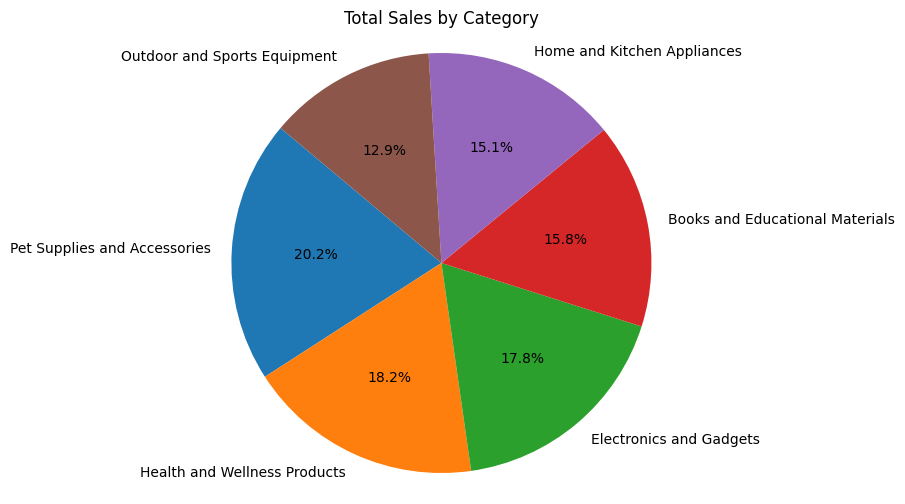

In [22]:
splt.figure(figsize=(9, 6))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Total Sales by Category')
plt.axis('equal')  
plt.show()

 How many customers are there in each state?

In [23]:
query5 = '''select State,
count(*) AS TotalCustomers
FROM Customers
group BY State
order BY TotalCustomers desc;
'''
NO_count = read_query(query5)
NO_count


,State,TotalCustomers
0,Manipur,14
1,Goa,14
2,Bihar,14
3,Nagaland,11
4,Himachal Pradesh,11
5,Arunachal Pradesh,11
6,Karnataka,11
7,Assam,10
8,Tripura,10
9,Chhattisgarh,10


In [24]:
States = NO_count['State'].values
No_counts = NO_count['TotalCustomers'].values

In [25]:
NO_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   State           21 non-null     object
 1   TotalCustomers  21 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes


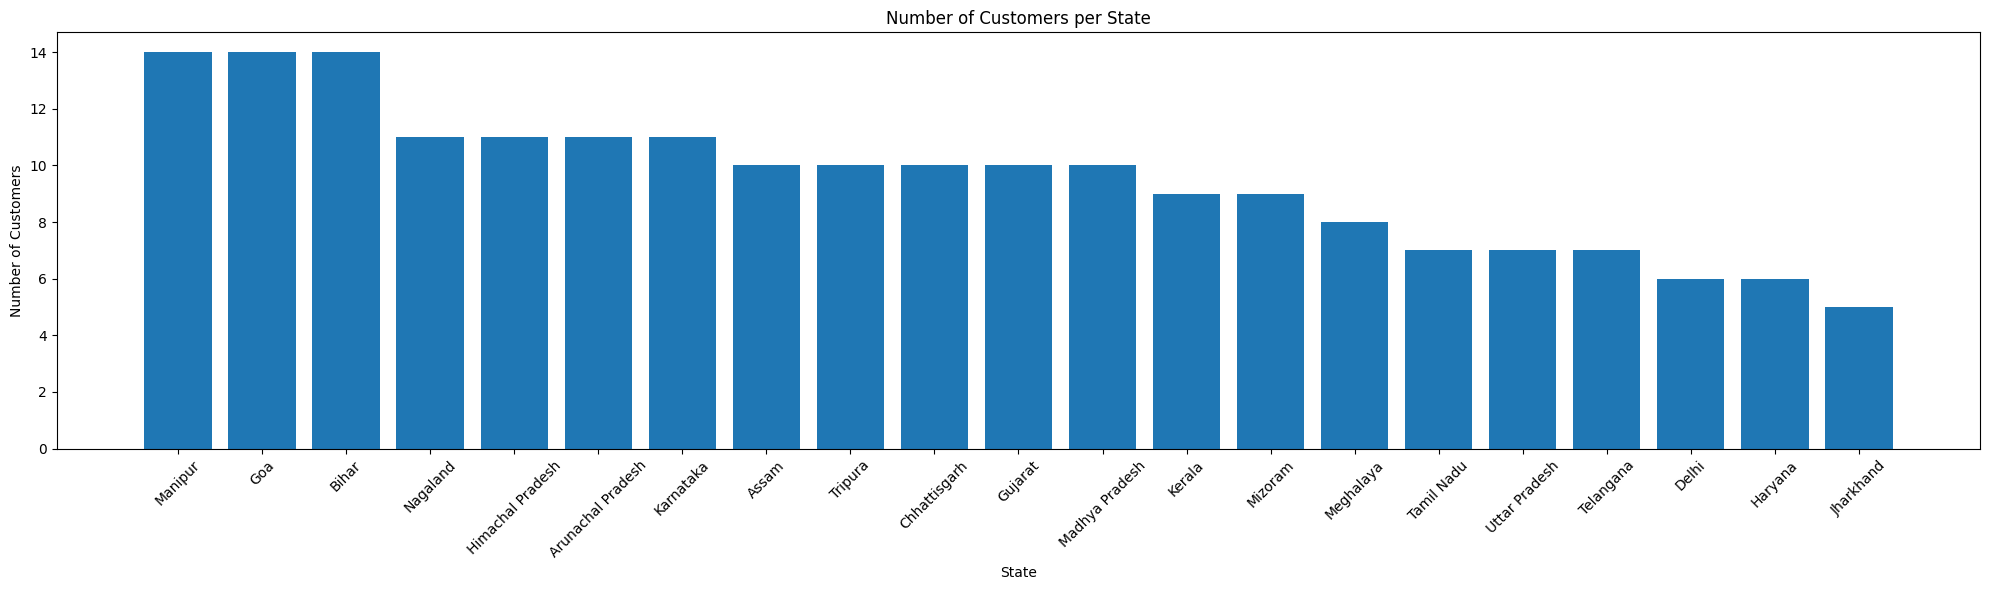

In [26]:
plt.figure(figsize=(20, 6))
plt.bar(States, No_counts)
plt.xlabel('State')
plt.ylabel('Number of Customers')
plt.title('Number of Customers per State')
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()

In [27]:
# select * from salesdata;
query6 = '''select  YEAR(saleDate) AS Year, SUM(TotalPrice) AS TotalSales
from salesdata
group BY YEAR(saleDate)
ORDER BY Year;'''

annual_Sale = read_query(query6)
annual_Sale

,Year,TotalSales
0,2023,1789274088.00


-- 9. Which supplier has the highest total sales?


In [28]:
query7 = """
select su.suppliername , sum(Totalprice) highest_sales
from salesdata  s
join subcategories sc on
s.subcatid = sc.subcatid
join suppliers su on
su.supplierid = sc.supplierid
group by su.suppliername
order by highest_sales desc;"""

In [29]:
suppliers = read_query(query7)
suppliers   

,suppliername,highest_sales
0,Dora-Aggarwal,180265340.00
1,Agate-Kalita,141629408.00
2,"Sridhar, Sidhu and Maharaj",124268051.00
3,"Sahota, Khurana and Kumar",119604888.00
4,Date-Mander,117152046.00
5,Verma-Vig,112563616.00
6,"Kapur, Acharya and Wadhwa",98842528.00
7,"Sastry, Bali and Deshmukh",86990482.00
8,Mall Group,82034102.00
9,"Khare, Boase and Gole",80254640.00


In [30]:
suplier_name = suppliers['suppliername'].values

Sales = suppliers['highest_sales'].values.reshape(-1,1)

In [31]:
suppliers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   suppliername   22 non-null     object
 1   highest_sales  22 non-null     object
dtypes: object(2)
memory usage: 484.0+ bytes


In [32]:
suppliers['highest_sales'] = suppliers['highest_sales'].astype('float')

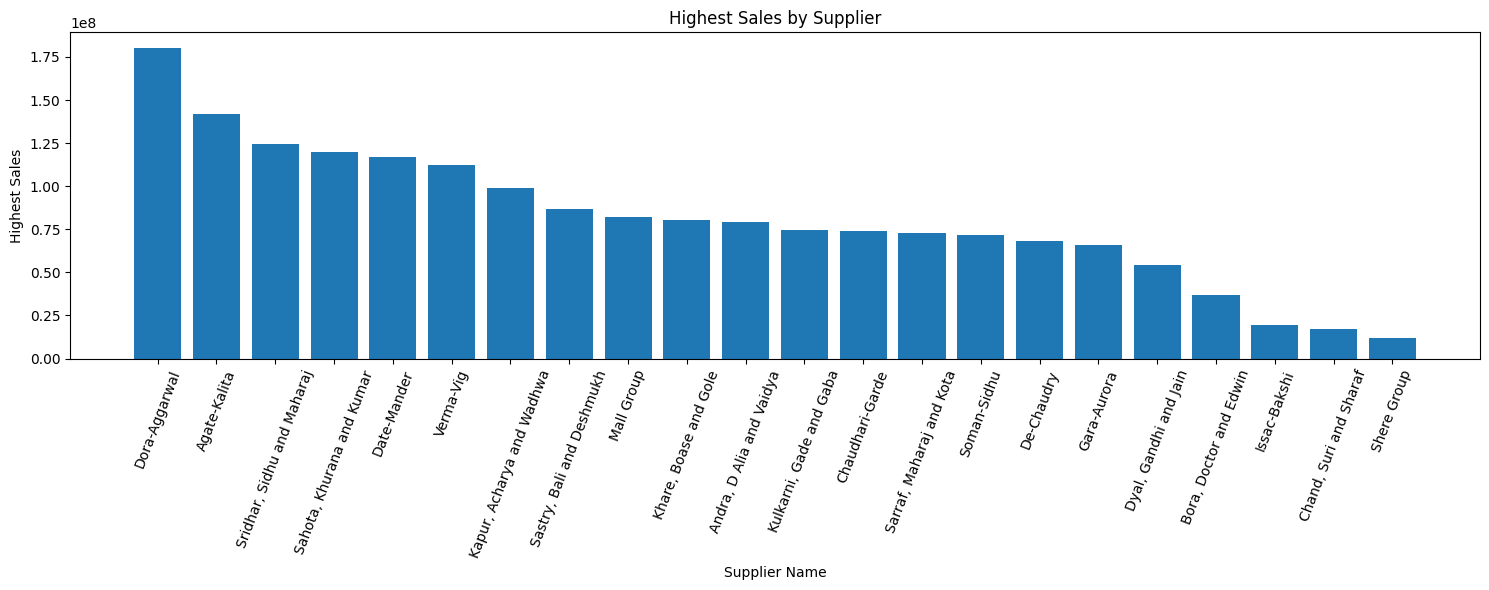

In [33]:
supplier_names = suppliers['suppliername'].values
highest_sales = suppliers['highest_sales'].values

plt.figure(figsize=(15, 6))
plt.bar(supplier_names, highest_sales)
plt.xlabel('Supplier Name')
plt.ylabel('Highest Sales')
plt.title('Highest Sales by Supplier')
plt.xticks(rotation=69)  
plt.tight_layout() 
plt.show()

-- 11. How many sales were made by each customer?


In [34]:
query8 = """select s.CustomerID,c.firstname,
count(*) AS TotalSales
from Salesdata s
join customers c
on s.CustomerID=c.CustomerID
group BY s.CustomerID,c.firstname
order by TotalSales desc;"""

df = read_query(query8)
df.head(10)

,CustomerID,firstname,TotalSales
0,C-2023-100-13,Veer,85
1,C-2023-100-130,Amira,81
2,C-2023-100-197,Yuvraj,81
3,C-2023-100-88,Dhruv,78
4,C-2023-100-57,Riya,77
5,C-2023-100-36,Romil,75
6,C-2023-100-75,Prerak,75
7,C-2023-100-101,Shray,74
8,C-2023-100-14,Tiya,73
9,C-2023-100-42,Divyansh,73


-- 10. What is the total revenue generated from sales in each state?


In [35]:
query9 = """select
c.State,
SUM(s.TotalPrice) AS Total_Revenue
from Salesdata s
JOIN Customers c ON s.CustomerID = c.CustomerID
group  BY c.State;"""

revenue_sates = read_query(query9)
revenue_sates

,State,Total_Revenue
0,Assam,91371978.00
1,Tripura,92329290.00
2,Nagaland,91511008.00
3,Manipur,122908203.00
4,Kerala,84668321.00
5,Delhi,53744487.00
6,Mizoram,76073281.00
7,Haryana,51660214.00
8,Chhattisgarh,91546717.00
9,Himachal Pradesh,102905140.00


In [36]:
States = revenue_sates['State'].values

revenue = revenue_sates['Total_Revenue'].values

In [37]:
revenue_sates['Total_Revenue'] = revenue_sates['Total_Revenue'].astype('float')

In [38]:
revenue_sates['Total_Revenue'].values

array([9.13719780e+07, 9.23292900e+07, 9.15110080e+07, 1.22908203e+08,
       8.46683210e+07, 5.37444870e+07, 7.60732810e+07, 5.16602140e+07,
       9.15467170e+07, 1.02905140e+08, 6.49903420e+07, 1.26990041e+08,
       6.54327590e+07, 9.73400330e+07, 6.01767230e+07, 9.96713860e+07,
       9.16244250e+07, 1.26103984e+08, 6.27428740e+07, 9.18591710e+07,
       4.36237110e+07])

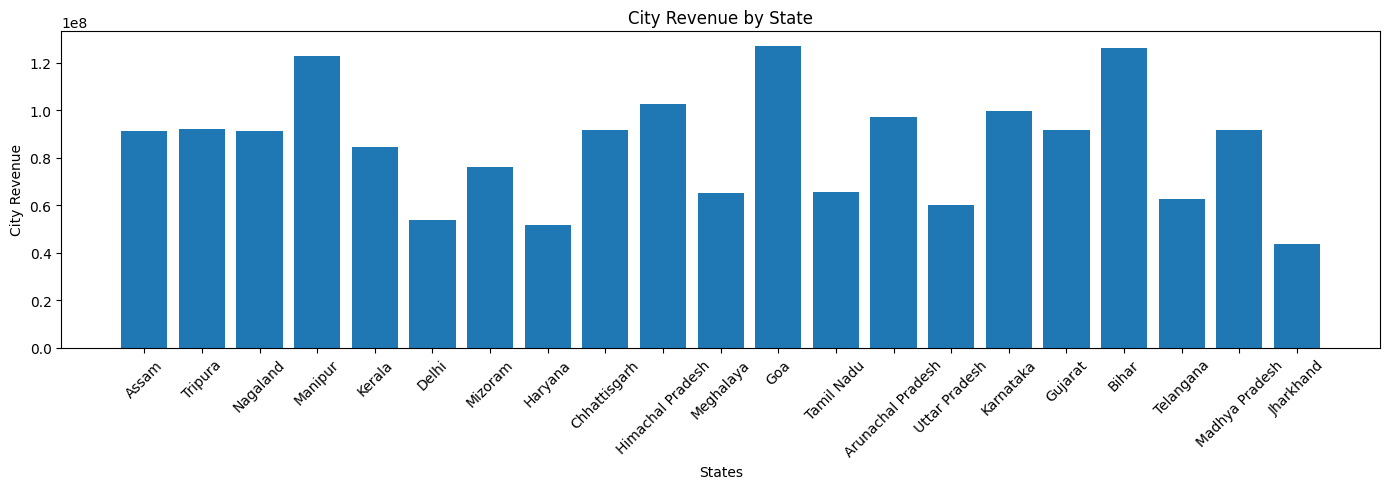

In [39]:


plt.figure(figsize=(14,5))
plt.bar(States, revenue)
plt.xlabel('States')
plt.ylabel('City Revenue')
plt.title('City Revenue by State')
plt.xticks(rotation=45)
plt.tight_layout() 
plt.show()

-- 14. What is the total revenue generated from sales in each category?


In [40]:
query10 = """select c.categoryname, sum(s.TotalPrice) as Total_revenue
from salesdata s
join subcategories sc on
s.subcatid = sc.subcatid
join categories c on
c.categoryid = sc.categoryid
group by c.categoryname
order by Total_revenue desc;"""

rev = read_query(query10)
rev

,categoryname,Total_revenue
0,Pet Supplies and Accessories,361848986.00
1,Health and Wellness Products,324761329.00
2,Electronics and Gadgets,319374417.00
3,Books and Educational Materials,282897933.00
4,Home and Kitchen Appliances,269316684.00
5,Outdoor and Sports Equipment,231074739.00


In [41]:
query15 = """select months, avg(monthlysales) OVER (order BY month_name ROWS BETWEEN 3
PRECEDING AND CURRENT ROW) AS Moving_avg
from
(SELECT
month(saledate) month_name,
monthname(SaleDate) as months,
sum(totalprice) as monthlysales
from Salesdata
Group by month(saledate),monthname(saledate)) e"""

moving_avg = read_query(query15)
moving_avg

,months,Moving_avg
0,January,155340130.000000
1,February,147842659.500000
2,March,149099290.000000
3,April,149497368.500000
4,May,151595866.000000
5,June,152391913.500000
6,July,151941736.500000
7,August,153888109.000000
8,September,149640559.000000
9,October,149630423.500000


In [42]:
Months = moving_avg['months'].values
Months

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype=object)

In [43]:
Move_avg = moving_avg['Moving_avg'].values
Move_avg


array([Decimal('155340130.000000'), Decimal('147842659.500000'),
       Decimal('149099290.000000'), Decimal('149497368.500000'),
       Decimal('151595866.000000'), Decimal('152391913.500000'),
       Decimal('151941736.500000'), Decimal('153888109.000000'),
       Decimal('149640559.000000'), Decimal('149630423.500000'),
       Decimal('149294489.000000'), Decimal('143933044.500000')],
      dtype=object)

In [44]:
moving_avg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   months      12 non-null     object
 1   Moving_avg  12 non-null     object
dtypes: object(2)
memory usage: 324.0+ bytes


In [45]:
moving_avg['Moving_avg'] = moving_avg['Moving_avg'].astype('float')

In [46]:
moving_avg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   months      12 non-null     object 
 1   Moving_avg  12 non-null     float64
dtypes: float64(1), object(1)
memory usage: 324.0+ bytes


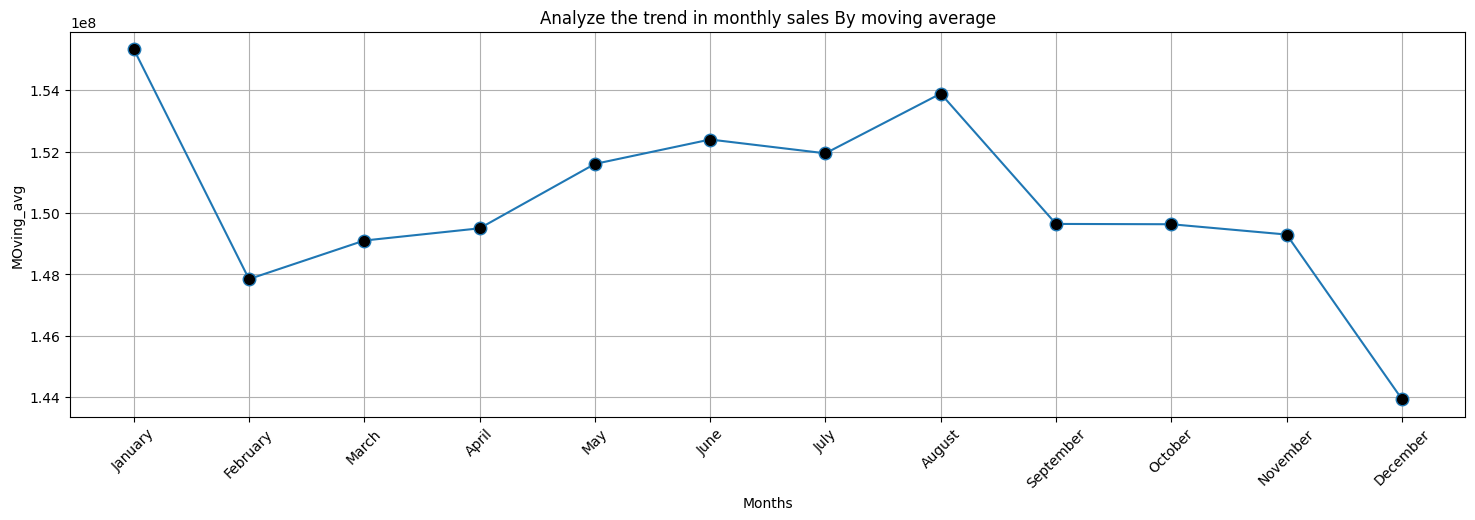

In [47]:
plt.figure(figsize=(18,5))
plt.plot(Months,Move_avg , marker = 'o' , ms = 9 , mfc= 'black')
plt.title('Analyze the trend in monthly sales By moving average')
plt.xlabel('Months')
plt.ylabel('MOving_avg')
plt.xticks(rotation=(45))
plt.grid()
plt.show()

-- 12. What is the total salary expenditure on employees in each department?


In [48]:
query11 = """select 
Department,
sum(Salary) AS TotalSalaryExpenditure
from Employees
group BY Department;"""

exp = read_query(query11)
exp

,Department,TotalSalaryExpenditure
0,Marketing,469413.37
1,Legal,577095.43
2,Accounts,445848.85
3,Logistics,365835.92
4,Sales,325662.92
5,ML Engineer,652081.28
6,HR Admin,482618.09
7,Engineering,393266.08
8,Analyst,732044.77
9,IT,351627.51


In [49]:
department = exp['Department'].values
department

array(['Marketing', 'Legal', 'Accounts', 'Logistics', 'Sales',
       'ML Engineer', 'HR Admin', 'Engineering', 'Analyst', 'IT'],
      dtype=object)

In [50]:
expenditur=  exp['TotalSalaryExpenditure'].values
expenditur

array([Decimal('469413.37'), Decimal('577095.43'), Decimal('445848.85'),
       Decimal('365835.92'), Decimal('325662.92'), Decimal('652081.28'),
       Decimal('482618.09'), Decimal('393266.08'), Decimal('732044.77'),
       Decimal('351627.51')], dtype=object)

In [51]:
exp['TotalSalaryExpenditure'] = exp['TotalSalaryExpenditure'].astype('float')

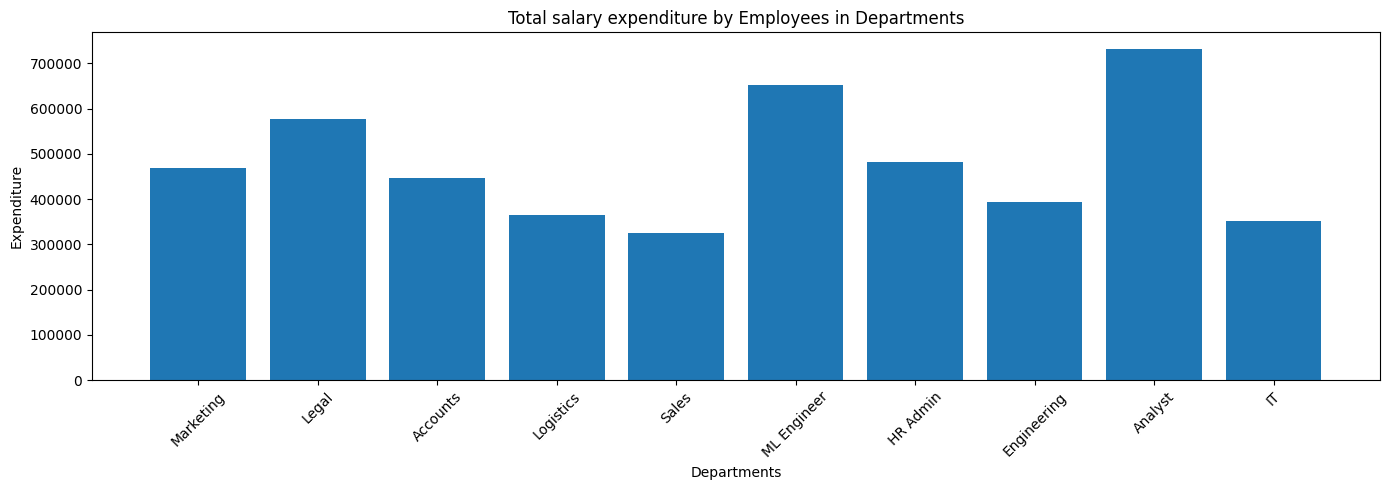

In [52]:
plt.figure(figsize=(14,5))
plt.bar(department, expenditur)
plt.xlabel('Departments')
plt.ylabel('Expenditure')
plt.title('Total salary expenditure by Employees in Departments')
plt.xticks(rotation=45)
plt.tight_layout() 
plt.show()

-- 13. Which subcategory has the highest average unit price?



In [53]:
query12 = """select Subcatname , avg(unitprice) as avg_price
from subcategories
group by Subcatname
order by avg_price desc;
"""

Df_Unite = read_query(query12)
Df_Unite

,Subcatname,avg_price
0,Pet beds,94029.000000
1,Laptops,88216.000000
2,Air fryer,85039.000000
3,Fiction novels,79862.000000
4,Camping stove,79387.000000
5,Pet toys,73286.000000
6,Essential oil diffuser,69542.000000
7,Meditation cushion,68360.000000
8,Leashes and collars,67312.000000
9,Fitness tracker,65592.000000


In [54]:
category_name = Df_Unite['Subcatname'].values
category_name


array(['Pet beds', 'Laptops', 'Air fryer', 'Fiction novels',
       'Camping stove', 'Pet toys', 'Essential oil diffuser',
       'Meditation cushion', 'Leashes and collars', 'Fitness tracker',
       'Wireless headphones', 'Smartwatches', 'Resistance bands',
       'Coffee maker', "Children's books", 'Bicycle', 'Workbooks',
       'Dog/cat food', 'Blender', 'Portable power banks', 'Instant Pot',
       'Textbooks', 'Running shoes', 'Cat litter', 'Camping tent',
       'Non-fiction books', 'Robot vacuum cleaner', 'Foam roller',
       'Smartphones', 'Yoga mat'], dtype=object)

In [55]:
Averages = Df_Unite['avg_price'].values
Averages

array([Decimal('94029.000000'), Decimal('88216.000000'),
       Decimal('85039.000000'), Decimal('79862.000000'),
       Decimal('79387.000000'), Decimal('73286.000000'),
       Decimal('69542.000000'), Decimal('68360.000000'),
       Decimal('67312.000000'), Decimal('65592.000000'),
       Decimal('63946.000000'), Decimal('63444.000000'),
       Decimal('59102.000000'), Decimal('58822.000000'),
       Decimal('58785.000000'), Decimal('55437.000000'),
       Decimal('45941.000000'), Decimal('40097.000000'),
       Decimal('37986.000000'), Decimal('34847.000000'),
       Decimal('34464.000000'), Decimal('33134.000000'),
       Decimal('26047.000000'), Decimal('23586.000000'),
       Decimal('22215.000000'), Decimal('14994.000000'),
       Decimal('14174.000000'), Decimal('14047.000000'),
       Decimal('9599.000000'), Decimal('1726.000000')], dtype=object)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   CustomerID  200 non-null    object
 1   firstname   200 non-null    object
 2   TotalSales  200 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 4.8+ KB


In [57]:
Df_Unite['avg_price'] = Df_Unite['avg_price'].astype('float')

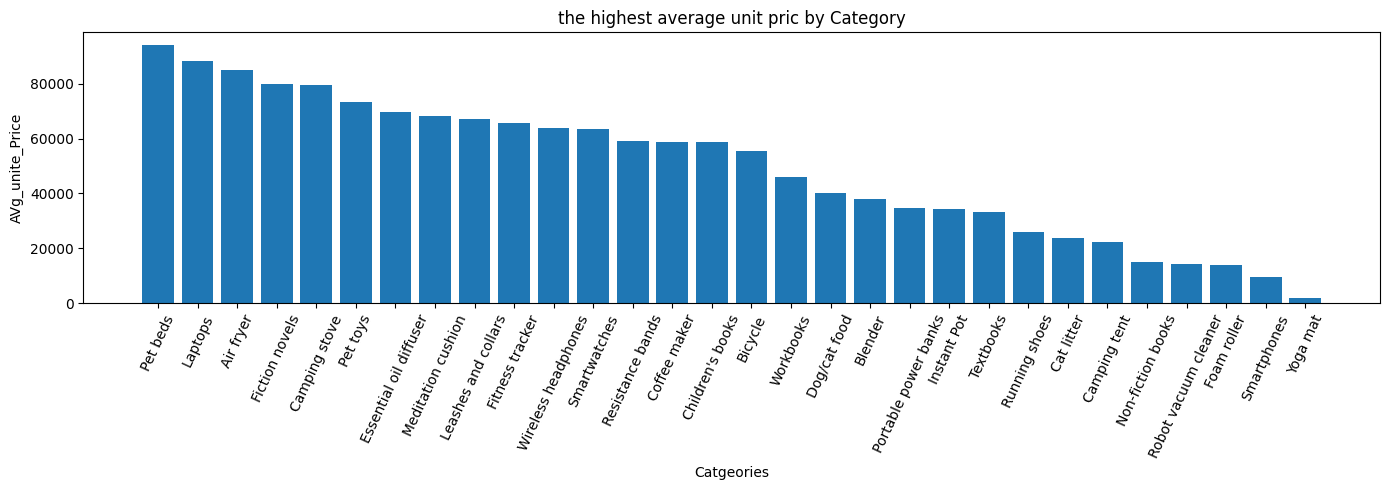

In [58]:
plt.figure(figsize=(14,5))
plt.bar(category_name, Averages)
plt.xlabel('Catgeories')
plt.ylabel('AVg_unite_Price')
plt.title('the highest average unit pric by Category')
plt.xticks(rotation=65)
plt.tight_layout() 
plt.show()

-- 14. What is the total revenue generated from sales in each category?


In [59]:
query13 = """select
c.CategoryName,
sum(s.TotalPrice) AS TotalRevenue
from Salesdata s
join Subcategories sc ON s.SubcatID = sc.SubcatID
join Categories c ON sc.CategoryID = c.CategoryID
group BY c.CategoryName;"""

read_query(query13)

,CategoryName,TotalRevenue
0,Electronics and Gadgets,319374417.00
1,Home and Kitchen Appliances,269316684.00
2,Outdoor and Sports Equipment,231074739.00
3,Health and Wellness Products,324761329.00
4,Books and Educational Materials,282897933.00
5,Pet Supplies and Accessories,361848986.00


In [60]:
query16 = """select MONTH(SaleDate) AS Monthnum , monthname(saledate) as months,
100*(SUM(TotalPrice) - LAG(SUM(TotalPrice)) OVER (ORDER BY
MONTH(SaleDate)))/
LAG(sum(TotalPrice)) OVER (order by  MONTH(SaleDate))AS
growth FROM Salesdata
group by YEAR(SaleDate), MONTH(SaleDate),monthname(saledate)
Order by YEAR(SaleDate), MONTH(SaleDate),monthname(saledate)"""

growths= read_query(query16)
growths

,Monthnum,months,growth
0,1,January,None
1,2,February,-9.652973
2,3,March,8.028321
3,4,April,-0.607435
4,5,May,8.655105
5,6,June,-12.339970
6,7,July,4.377128
7,8,August,5.784089
8,9,September,-7.403703
9,10,October,-2.218206


In [61]:
months = growths['months'].values
months

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype=object)

In [62]:
GR_rate = growths['growth'].values
GR_rate

array([None, Decimal('-9.652973'), Decimal('8.028321'),
       Decimal('-0.607435'), Decimal('8.655105'), Decimal('-12.339970'),
       Decimal('4.377128'), Decimal('5.784089'), Decimal('-7.403703'),
       Decimal('-2.218206'), Decimal('3.470143'), Decimal('-7.703196')],
      dtype=object)

In [63]:
growths['growth'] =  growths['growth'].astype('float')

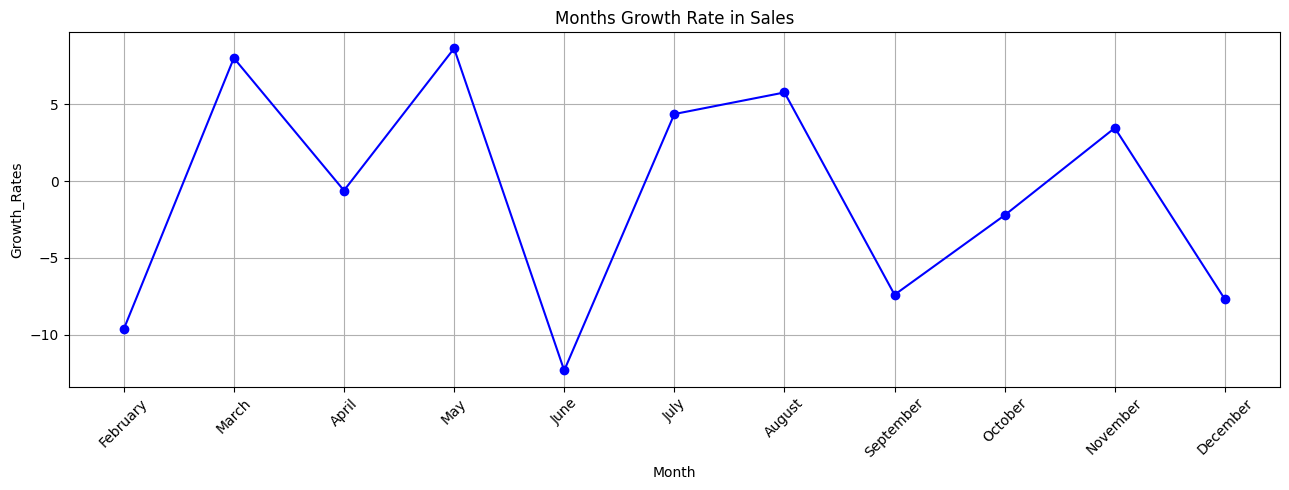

In [64]:
plt.figure(figsize=(13,5))
plt.plot(months, GR_rate, marker='o', color='blue')
plt.title('Months Growth Rate in Sales')
plt.xlabel('Month')
plt.ylabel('Growth_Rates')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Provide a visual representation of our annual sales performance over time?

In [65]:
query = """
select months, Monthly_sales
from (select MONTH(saledate),
MONTHNAME(saledate) AS Months,
SUM(totalprice) AS Monthly_sales
from salesdata
group BY MONTH(saledate), MONTHNAME(saledate)
order by MONTH(saledate) asc
) e

"""

df = read_query(query)
df

,months,Monthly_sales
0,January,155340130.00
1,February,140345189.00
2,March,151612551.00
3,April,150691604.00
4,May,163734120.00
5,June,143529379.00
6,July,149811843.00
7,August,158477094.00
8,September,146743920.00
9,October,143488837.00


In [66]:
months = df['months'].values
sales = df['Monthly_sales'].astype('float')

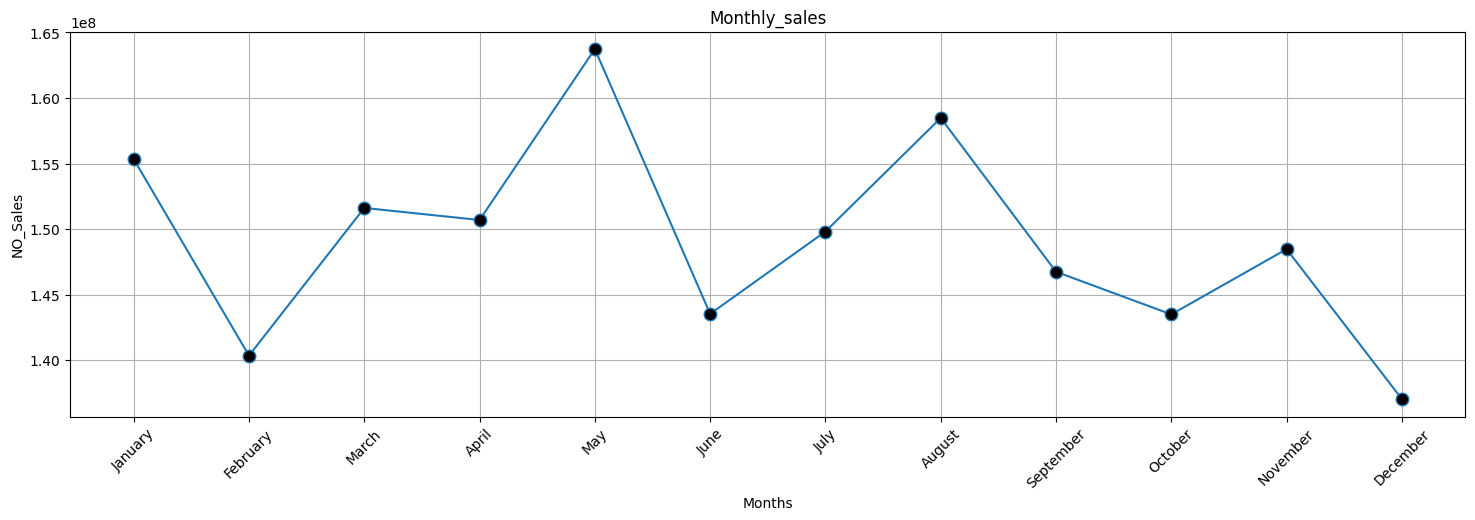

In [67]:
plt.figure(figsize=(18,5))
plt.plot(months,sales , marker = 'o' , ms = 9 , mfc= 'black')
plt.title('Monthly_sales')
plt.xlabel('Months')
plt.ylabel('NO_Sales')
plt.xticks(rotation=(45))
plt.grid()
plt.show()